https://pbpython.com/bullet-graph.html

# Load the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import glob, os

data_dir= '/content/gdrive/My Drive/'
os.chdir(data_dir)
filename = 'BulletChartMI.csv'

df=pd.read_csv(filename)
print("Column headings:")
print(df.columns)

Column headings:
Index(['StudentNumber', 'MatchID', 'StudentName', 'Campus', 'GradeLevel',
       'Homeroom', 'Discipline', 'CoreTeacher', 'Gender', 'DLStatus',
       'ELStatus', 'CurrentEL', 'Race', 'EcDis', 'W20GrowthGoal',
       'W20TargetRIT', 'S20CRGrowthGoal', 'S20CRTargetRIT',
       'S20TypicalGrowthGoal', 'S20TypicalTargetRIT', 'S19RIT', 'S19%ile',
       'F19RIT', 'F19%ile', 'BaselineRIT', 'Baseline Percentile', 'W20RIT',
       'W20%ile', 'W20CGP', 'BtoWChange', 'MetWinterGoal', 'NumberOfAbsences',
       'AbsenceCategory', 'NumberOfDiscipline', 'Disciplinez-Score',
       'DisciplineCategory'],
      dtype='object')


In [ ]:
#Dropping the Michigan schools
df.drop(df[df.Campus == '3146'].index, inplace=True)

In [ ]:
df.drop(df[df.Campus == '3147'].index, inplace=True)

In [ ]:
df.Campus.unique()

array(['Prairie', 'Bucktown', 'Irving Park', 'West Belden', 'Redford',
       'Harper Woods', 'Art in Motion', 'Plymouth Educational Center'],
      dtype=object)

In [ ]:
#Only keeping MI schools
df=df[(df.Campus == 'Plymouth Educational Center')|(df.Campus == 'Redford')|(df.Campus == 'Harper Woods')]

In [ ]:
df.tail()

,StudentNumber,MatchID,StudentName,Campus,GradeLevel,Homeroom,Discipline,CoreTeacher,Gender,DLStatus,ELStatus,CurrentEL,Race,EcDis,W20GrowthGoal,W20TargetRIT,S20CRGrowthGoal,S20CRTargetRIT,S20TypicalGrowthGoal,S20TypicalTargetRIT,S19RIT,S19%ile,F19RIT,F19%ile,BaselineRIT,Baseline Percentile,W20RIT,W20%ile,W20CGP,BtoWChange,MetWinterGoal,NumberOfAbsences,AbsenceCategory,NumberOfDiscipline,Disciplinez-Score,DisciplineCategory
6849,20007139,1041694567,"Wright, Jamir",Plymouth Educational Center,K,Webster Q,Reading,Webster Q,M,No,Not EL,No,BLK,Yes,15.0,140.0,29.0,154.0,21.0,146.0,NaN,NaN,125.0,12.0,125.0,12.0,135.0,10.0,31.0,10.0,0.0,13.0,Chronic Absence,0,-0.384157,Fewer Incidents than Peers
6850,20006982,4357652840,"Wright, Ja'Niya",Plymouth Educational Center,5th,Wright J,Reading,Wright J,F,No,Not EL,No,BLK,Yes,7.0,192.0,14.0,199.0,10.0,195.0,185.0,8.0,200.0,35.0,185.0,8.0,202.0,30.0,31.0,17.0,1.0,11.0,Chronic Absence,0,-0.384157,Fewer Incidents than Peers
6851,20007095,4115709587,"Wright, Londyn",Plymouth Educational Center,K,Billingslea R,Reading,Billingslea R,F,No,Not EL,No,BLK,Yes,9.0,155.0,17.0,163.0,16.0,162.0,NaN,2.0,146.0,64.0,146.0,2.0,146.0,34.0,4.0,0.0,0.0,18.0,Severe Chronic Absence,0,-0.384157,Fewer Incidents than Peers
6852,20006963,5194906886,"Wright, Madison",Plymouth Educational Center,1st,Strawder N,Reading,Strawder N,F,No,Not EL,No,BLK,Yes,9.0,176.0,18.0,185.0,18.0,185.0,167.0,78.0,165.0,63.0,167.0,78.0,157.0,14.0,1.0,-10.0,0.0,11.0,Chronic Absence,0,-0.384157,Fewer Incidents than Peers
6853,20007025,2462928580,"Young, Erik",Plymouth Educational Center,8th,Hill S,Reading,Dean E,M,No,Not EL,No,BLK,Yes,2.0,226.0,3.0,227.0,2.0,226.0,NaN,NaN,224.0,67.0,224.0,67.0,221.0,55.0,24.0,-3.0,0.0,2.0,Strong Attendance,1,1.536626,More Incidents than Peers


In [ ]:
keep = ['W20RIT','S20CRTargetRIT','F19RIT','W20TargetRIT','S20TypicalTargetRIT']

In [ ]:
df.groupby(['Campus',"Discipline"], as_index=False)[keep].mean().round(1)

,Campus,Discipline,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
0,Harper Woods,Mathematics,178.9,191.4,170.2,182.6,188.3
1,Harper Woods,Reading,176.4,185.3,167.1,177.5,182.7
2,Plymouth Educational Center,Mathematics,185.8,198.9,181.8,190.9,194.8
3,Plymouth Educational Center,Reading,183.8,193.9,180.2,187.2,191.0
4,Redford,Mathematics,170.1,184.1,163.0,174.4,181.2
5,Redford,Reading,167.9,179.7,161.1,171.1,177.3


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np

%matplotlib inline

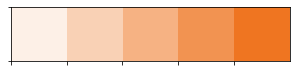

In [ ]:
#reading
sns.palplot(sns.light_palette('#ef7521', 5))


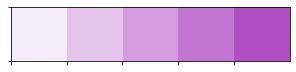

In [ ]:
#math
sns.palplot(sns.light_palette('#b24ec4', 5))

# Total Average for Distinctive Schools

In [ ]:
#Total math and reading mean for Distinctive Schools
total = df.groupby(["Discipline"], as_index=False)[keep].mean().round(1)
total

,Discipline,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
0,Mathematics,180.7,193.6,174.3,185.0,189.9
1,Reading,178.5,188.3,172.1,180.8,185.4


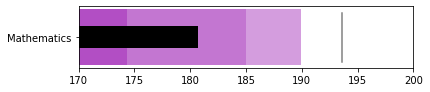

In [ ]:
limits = [ 174.3,185, 189.9]
data_to_plot = ("Mathematics", 180.7, 193.6)
palette = sns.light_palette('#b24ec4', 5, reverse=True)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_xlim(170, 200)
ax.set_yticklabels([data_to_plot[0]])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=5, color=palette[idx])
    prev_limit = lim

# Draw the value we're measuring
ax.barh([1], data_to_plot[1], color='black', height=2)
ax.axvline(data_to_plot[2], color="gray", ymin=0.10, ymax=0.9)

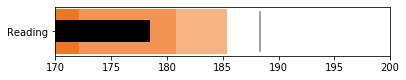

In [ ]:
limits = [172.1,180.8, 185.4]
data_to_plot = ("Reading",178.5,188.3 )
palette = sns.light_palette('#ef7521', 5, reverse=True)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_xlim(170, 200)
ax.set_yticklabels([data_to_plot[0]])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=4, color=palette[idx])
    prev_limit = lim

# Draw the value we're measuring
ax.barh([1], data_to_plot[1], color='black', height=2)
ax.axvline(data_to_plot[2], color="gray", ymin=0.10, ymax=0.9)

In [ ]:
#adding as_index=False to make the groupby output into a dataframe
schools = df.groupby(['Campus',"Discipline"], as_index=False)[keep].mean().round(1)

In [ ]:
schools= schools.dropna()

In [ ]:
schools.tail()

,Campus,Discipline,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
1,Harper Woods,Reading,176.4,185.3,167.1,177.5,182.7
2,Plymouth Educational Center,Mathematics,185.8,198.9,181.8,190.9,194.8
3,Plymouth Educational Center,Reading,183.8,193.9,180.2,187.2,191.0
4,Redford,Mathematics,170.1,184.1,163.0,174.4,181.2
5,Redford,Reading,167.9,179.7,161.1,171.1,177.3


# School Average

In [ ]:
math = schools[schools['Discipline']=='Mathematics']
math = math.drop(columns=['Discipline'])

In [ ]:
math

,Campus,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
0,Harper Woods,178.9,191.4,170.2,182.6,188.3
2,Plymouth Educational Center,185.8,198.9,181.8,190.9,194.8
4,Redford,170.1,184.1,163.0,174.4,181.2


In [ ]:
reading = schools[schools['Discipline']=='Reading']
reading = reading.drop(columns=['Discipline'])

In [ ]:
def get_data(df, n=3):
    """ 
    get the data and limits ready for the bullet plot
        Args:
            df = groupbyed dataframe
        Returns:
            a list for text/bar/line
            a list for background color
            floor: a number for the plot min
            ceiling: a number for the plot max

    """
    #Create the text, bar and line
    tbl = df.iloc[:, :n].values.tolist()
    #Create the limits for background color
    bc = df.iloc[:, np.r_[n:n+3]].values.tolist()

    floor = round(df['F19RIT'].min()/5-1)*5
    ceiling = 5 + round(df['S20CRTargetRIT'].max()/5)*5 

    return tbl, bc, floor, ceiling

In [ ]:
import matplotlib.font_manager
csfont = {'fontname':'Calibri'}
def bulletgraph(data=None, limits=None, labels=None, ranges=None, axis_label=None, title=None,
                size=(5, 3), subject= 'Reading', formatter=None, target_color="black", bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            lim = list of xlims 
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            subject = maths or reading
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[0][-1] / 40

    # Use the green palette as a sensible default
    
    if subject =='Reading':
      palette = sns.light_palette('#ef7521', 3, reverse=True)
    else:
      palette = sns.light_palette('#b24ec4', 3, reverse=True)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        #Text for that bar
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.set_xlim(ranges)
        ax.spines['bottom'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(True)

        prev_limit = 0
        for idx2, lim in enumerate(limits[idx]):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
            rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=20, **csfont)
    fig.subplots_adjust(hspace=0)

In [ ]:
t1, l1, f1, c1 = get_data(math)

In [ ]:
t1

[['Harper Woods', 178.9, 191.4],
 ['Plymouth Educational Center', 185.8, 198.9],
 ['Redford', 170.1, 184.1]]

In [ ]:
l1

[[170.2, 182.6, 188.3], [181.8, 190.9, 194.8], [163.0, 174.4, 181.2]]

In [ ]:
tlr, llr, fr, cl = get_data(reading)

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


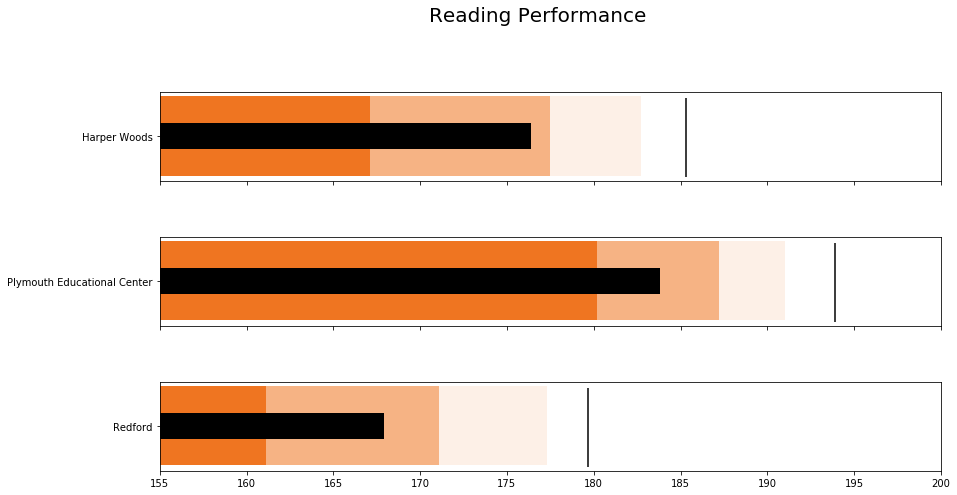

In [ ]:
bulletgraph(tlr, llr, ranges =(fr,cl), size=(14,8), subject='Reading', label_color="black", target_color='black',title="Reading Performance")

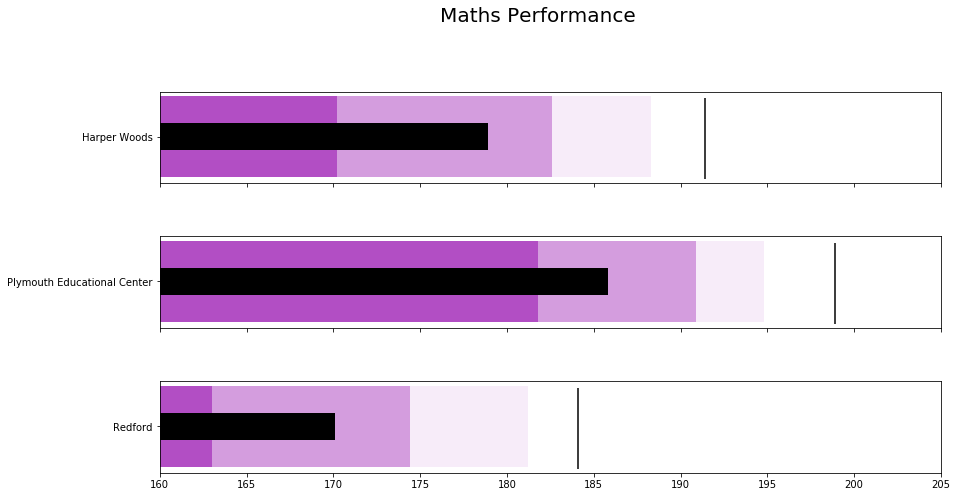

In [ ]:
bulletgraph(t1, l1, ranges =(f1,c1), size=(14,8), subject='Math',
            title="Maths Performance")

# By grade level

In [ ]:
#adding as_index=False to make the groupby output into a dataframe
grade = df.groupby(['GradeLevel','Campus',"Discipline"], as_index=False)[keep].mean().round(1)
grade= grade.dropna()

In [ ]:
gmath = grade[grade['Discipline']=='Mathematics']
gmath = gmath.drop(columns=['Discipline'])
gmath.head()

,GradeLevel,Campus,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
0,1st,Harper Woods,171.5,188.6,163.6,178.8,186.7
2,1st,Plymouth Educational Center,157.9,173.5,148.9,160.5,169.7
4,1st,Redford,166.9,178.3,155.9,166.9,175.7
6,2nd,Harper Woods,179.0,190.8,169.7,182.2,187.2
8,2nd,Plymouth Educational Center,177.1,190.2,170.9,181.4,187.0


In [ ]:
gread = grade[grade['Discipline']=='Reading']
gread = gread.drop(columns=['Discipline'])
gread.head()

,GradeLevel,Campus,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
1,1st,Harper Woods,167.6,182.8,160.5,173.8,181.1
3,1st,Plymouth Educational Center,155.5,171.2,151.3,160.3,168.3
5,1st,Redford,160.4,173.0,151.8,162.6,170.8
7,2nd,Harper Woods,173.6,183.2,166.7,175.2,180.2
9,2nd,Plymouth Educational Center,173.1,182.5,167.6,174.2,179.5


In [ ]:
 def slice_data(df, sub='Reading'):
    '''
    get the data and limits ready for the bullet plot
        Args:
            df = groupbyed dataframe
        Returns:
            a list for text/bar/line
            a list for background color
            floor: a number for the plot min
            ceiling: a number for the plot max

    '''
    #Create the text, bar and line
    for grade in list(df.GradeLevel.unique()):
        mni = df.loc[df['GradeLevel'] == grade]
        mni = mni.drop(columns=['GradeLevel'])
        tl, ll, fr, cl = get_data(mni, n=3)
        bulletgraph(tl, ll, ranges =(fr,cl), size=(14,8), subject=sub,title=grade+" Grade "+ sub+" Performance")

    return 

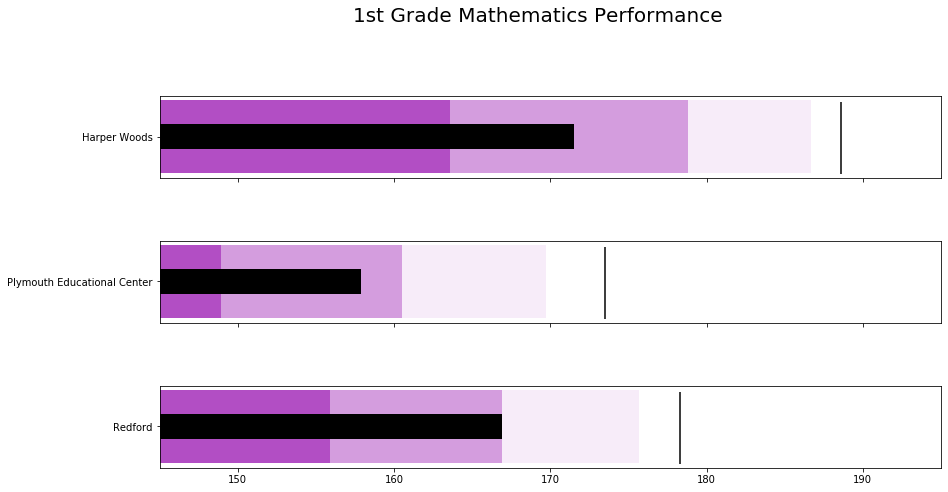

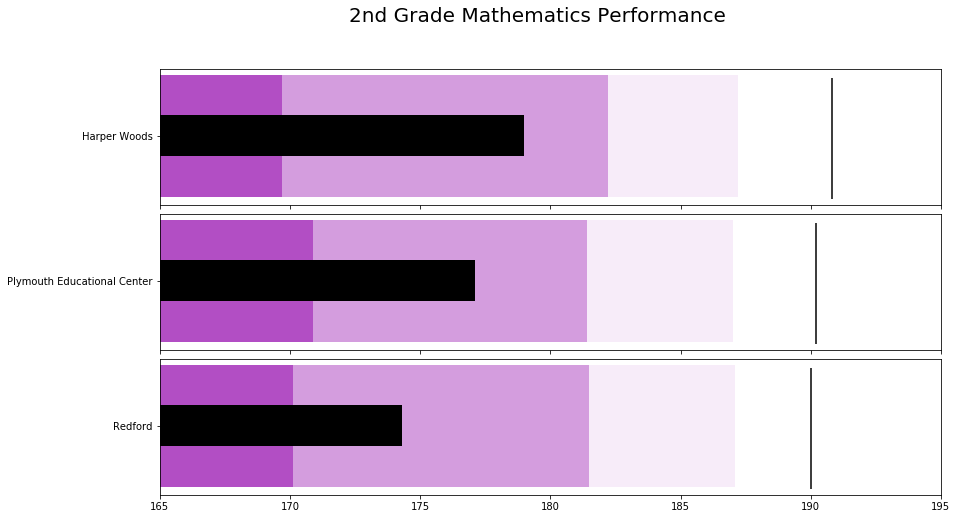

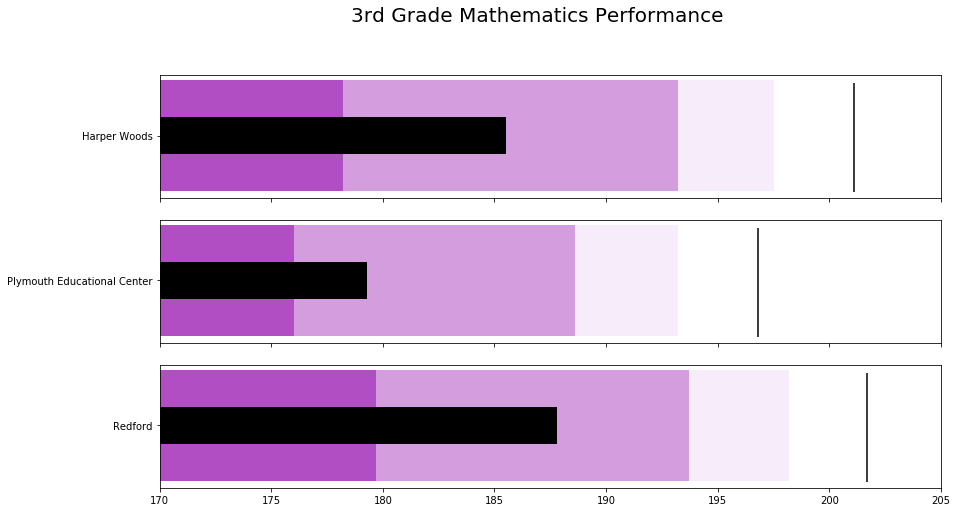

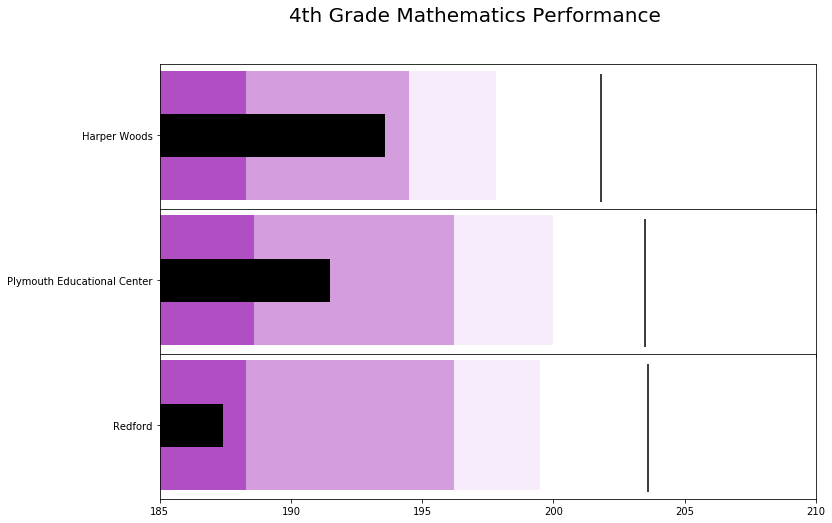

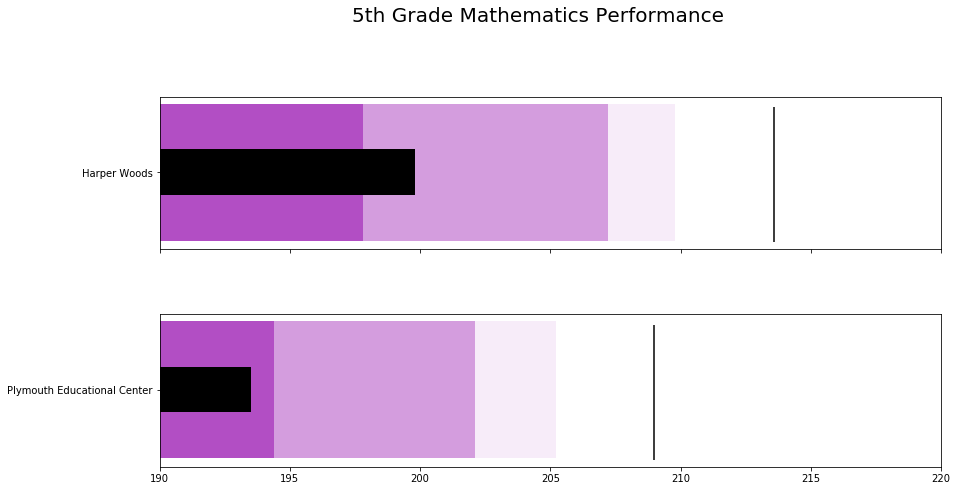

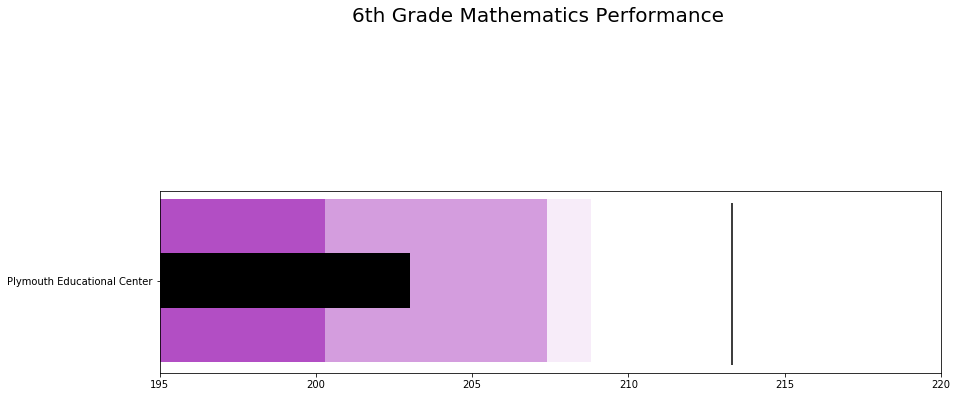

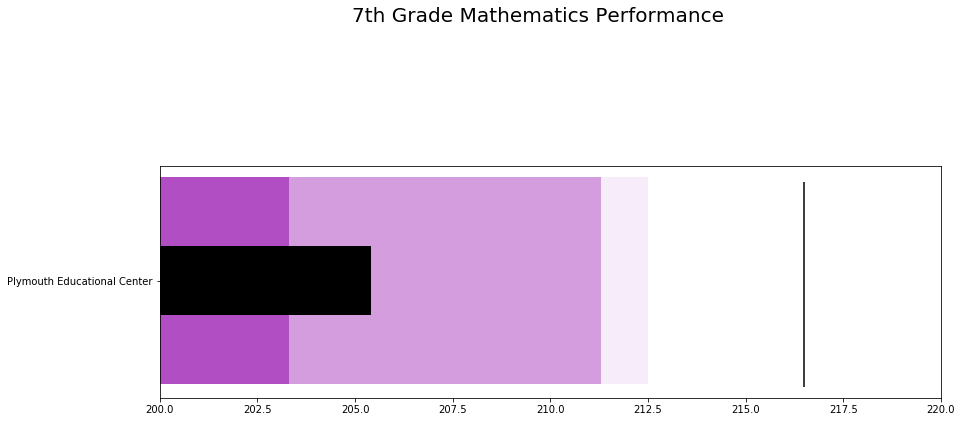

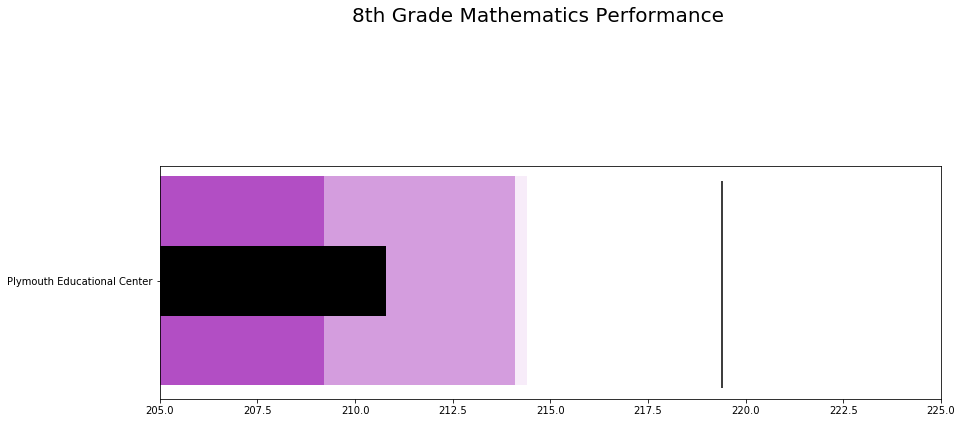

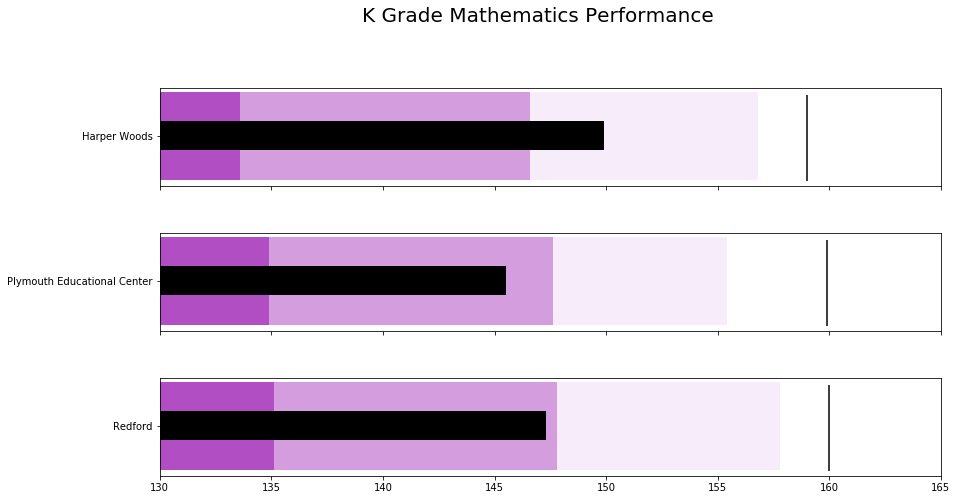

In [ ]:
slice_data(gmath, sub='Mathematics')

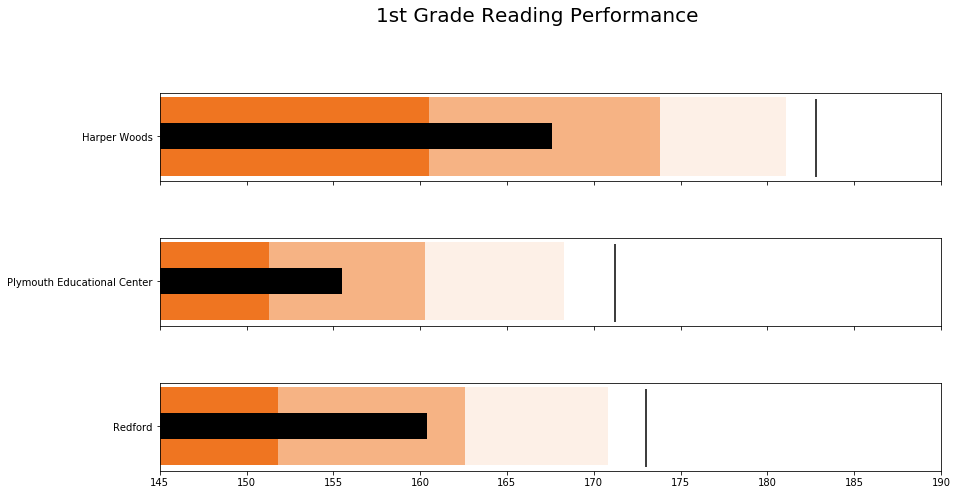

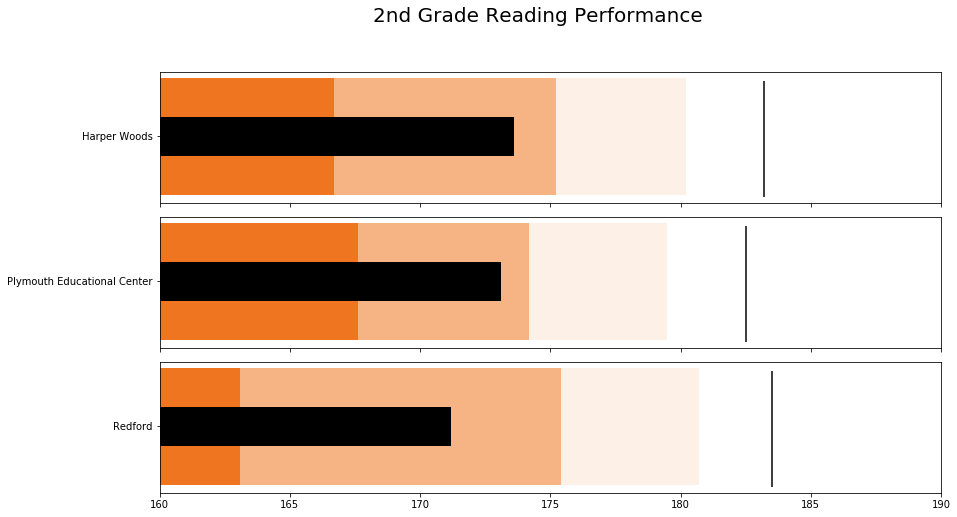

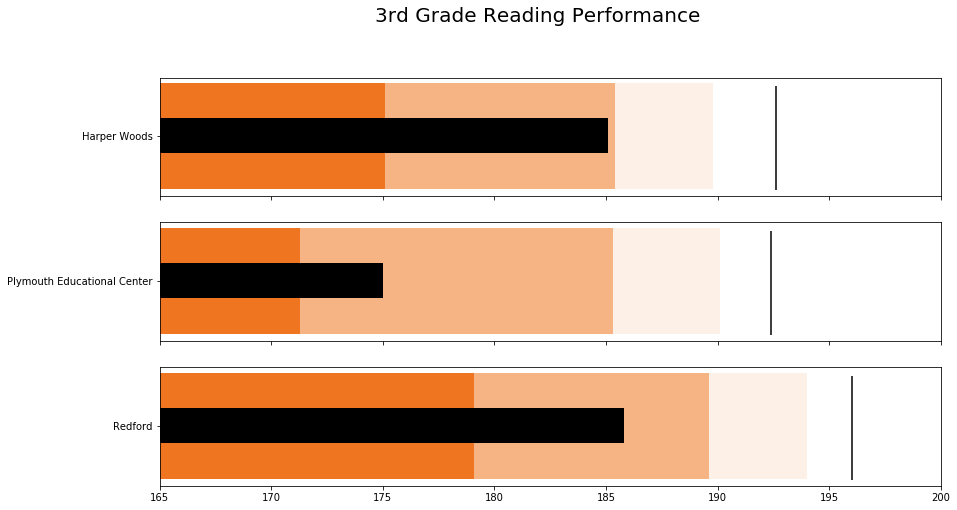

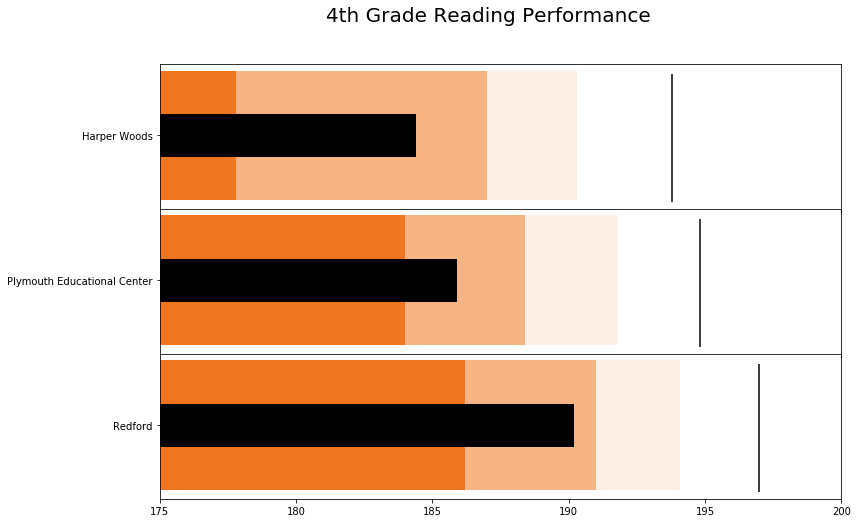

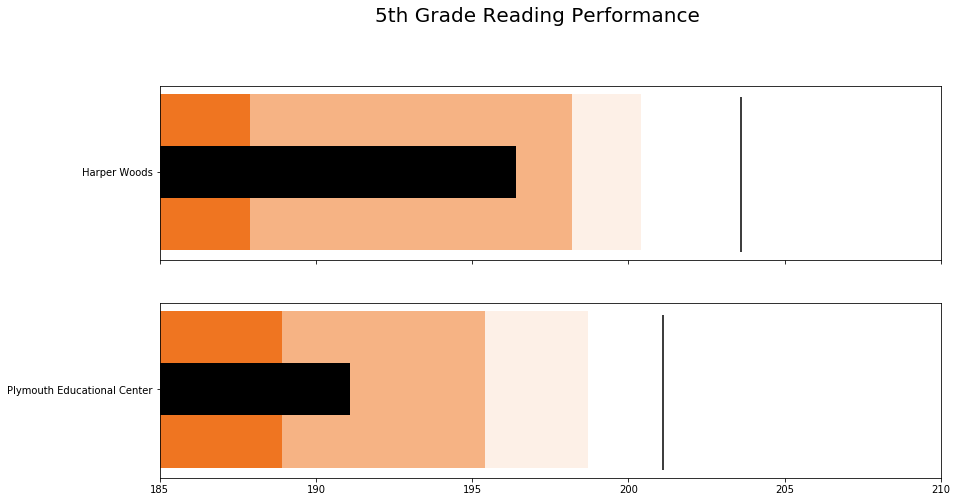

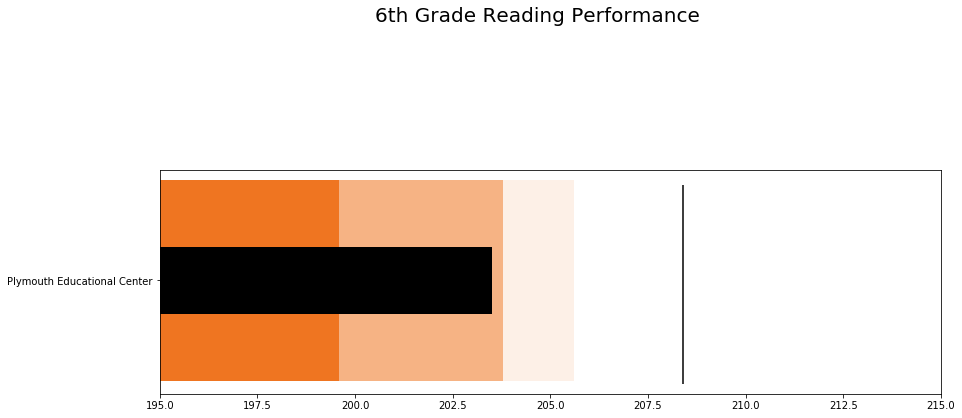

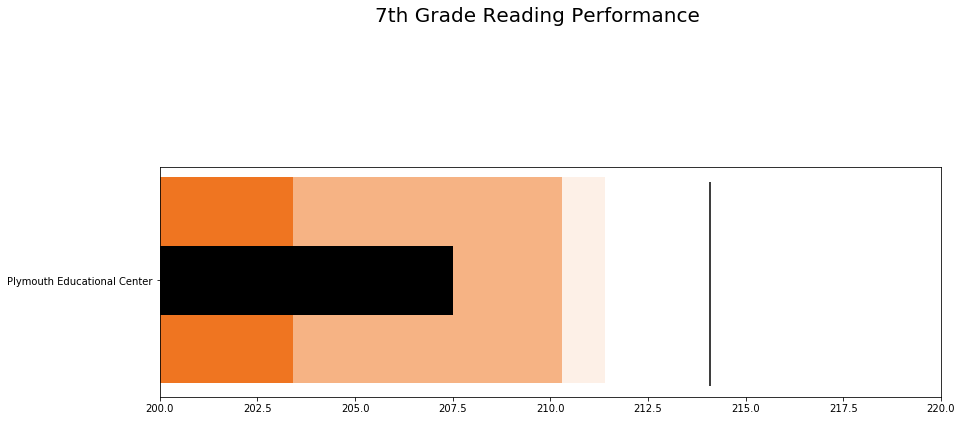

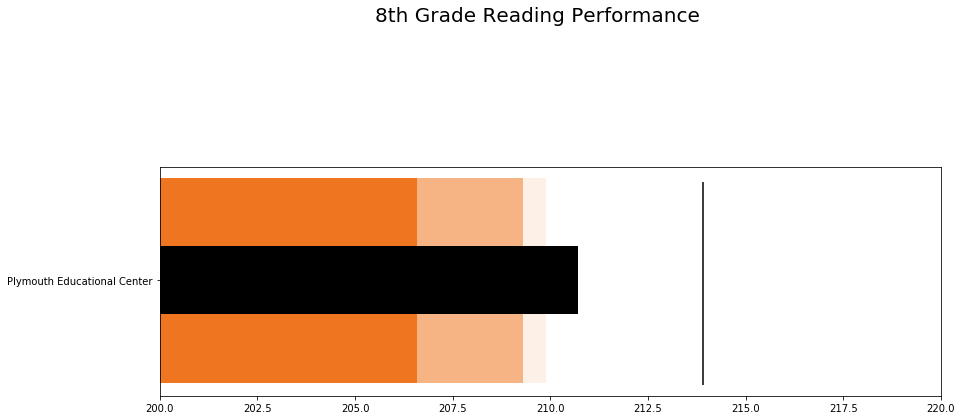

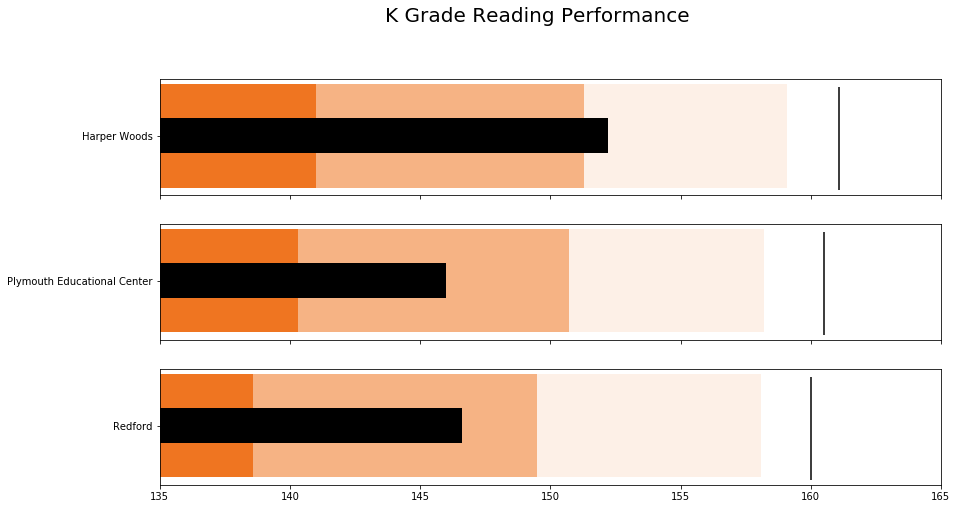

In [ ]:
slice_data(gread)